In [17]:
import keras
from keras.models import Model
from keras.layers import *
from keras.optimizers import *

In [18]:
import h5py
with h5py.File('dataset.h5','r') as hf:
    X = hf['X'][:]
    y = hf['y'][:]
    X_test = hf['X_test'][:]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)


In [21]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val  /= 255
X_test /= 255

X_train = X_train.reshape(-1,256,256,1)
X_val = X_val.reshape(-1,256,256,1)
X_test = X_test.reshape(-1,256,256,1)

In [22]:
inputs = Input((256, 256,1))
Conv = Conv2D(1, kernel_size=(3,3), strides=(5, 5), padding='same', activation='linear')(inputs)
Conv = Conv2D(1, kernel_size=(3,3), strides=(5, 5), padding='same', activation='linear')(Conv)
flat = Flatten()(Conv)
dense = Dense(2,activation = 'tanh')(flat)
dense = Dense(1, activation = 'sigmoid')(dense)

model = Model(inputs, dense)
model.compile(loss='mean_squared_error',optimizer=SGD(lr=2.0), metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 1)         10        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 1)         10        
_________________________________________________________________
flatten_2 (Flatten)          (None, 121)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 244       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 267
Trainable params: 267
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=30,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 120 samples, validate on 30 samples
Epoch 1/30
120/120 [==============================] - 1s 5ms/step - loss: 0.2470 - acc: 0.5083 - val_loss: 0.2414 - val_acc: 0.6000
Epoch 2/30
120/120 [==============================] - 0s 526us/step - loss: 0.2429 - acc: 0.6083 - val_loss: 0.3478 - val_acc: 0.5000
Epoch 3/30
120/120 [==============================] - 0s 506us/step - loss: 0.3387 - acc: 0.5167 - val_loss: 0.2797 - val_acc: 0.4667
Epoch 4/30
120/120 [==============================] - 0s 509us/step - loss: 0.2744 - acc: 0.4667 - val_loss: 0.2975 - val_acc: 0.5000
Epoch 5/30
120/120 [==============================] - 0s 552us/step - loss: 0.3038 - acc: 0.4833 - val_loss: 0.2643 - val_acc: 0.5000
Epoch 6/30
120/120 [==============================] - 0s 535us/step - loss: 0.2559 - acc: 0.5167 - val_loss: 0.2424 - val_acc: 0.6667
Epoch 7/30
120/120 [==============================] - 0s 568us/step - loss: 0.2392 - acc: 0.5917 - val_loss: 0.2656 - val_acc: 0.5000
Epoch 8/30
120/120 

plota gráfico de erro e acurácia

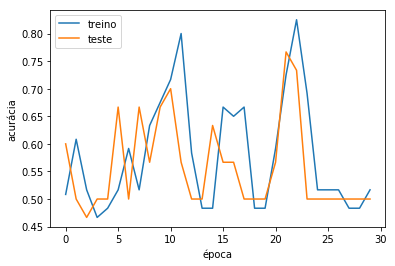

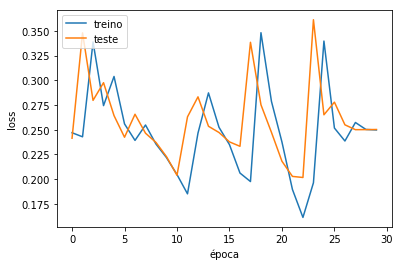

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

Cria arquivo para nos enviar

In [25]:
pred = model.predict(X_test)
np.savetxt('resul.csv', pred)

In [26]:
X_test.shape

(50, 256, 256, 1)